# Assessing the founded Policy Set

In [1]:
# Import general python packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over,time_step_0,time_step_1, time_step_2, time_step_3, time_step_4

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Scenario,
                           Constraint, ScalarOutcome, TimeSeriesOutcome, ArrayOutcome)
from ema_workbench.util import ema_logging
from ema_workbench import save_results, load_results
from ema_workbench.em_framework.optimization import (EpsilonProgress)
from ema_workbench.analysis import parcoords

## Model initializen

In [2]:

def initialize_model():
    ema_logging.log_to_stderr(ema_logging.INFO)
    print("Initializing model...")
    dike_model, planning_steps = get_model_for_problem_formulation(7)
    print("Model initialized.")
    return dike_model, planning_steps

# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor, uncertainties, levers):
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE

    model.uncertainties = uncertainties
    model.levers = levers

    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])

    if problem_formulation_actor == 6:  # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            ScalarOutcome(f'Total_period_Costs_2',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A1_', variable_name='A.1_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A2_', variable_name='A.2_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A3_', variable_name='A.3_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]


    elif problem_formulation_actor == 7:  # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            ScalarOutcome(f'Total_period_Costs_2',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A4_', variable_name='A.4_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A5_', variable_name='A.5_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]

    else:
        raise TypeError('unknown identifier')
    return model

### Overijssel
if __name__ == '__main__':
    dike_model, planning_steps = initialize_model()

    uncertainties = dike_model.uncertainties
    levers = dike_model.levers
    
    model = problem_formulation_actor(7, uncertainties, levers)

    # Deepcopying the uncertainties and levers
    uncertainties = copy.deepcopy(dike_model.uncertainties)
    levers = copy.deepcopy(dike_model.levers)

    # Running the optimization for Overijssel
    function = DikeNetwork()

Initializing model...
Model initialized.


## Obtaining the policies from the Directed Search 
### (not used, since exploration is done in Supercomputer)

In [3]:
#read a CSV file into a DataFrame
rf_policy_set= pd.read_csv('Week24_MORDM_outcomes_overijssel_PD7_.csv')

In [4]:
rf_policy_set

,0_RfR 0,0_RfR 1,0_RfR 2,0_RfR 3,0_RfR 4,1_RfR 0,1_RfR 1,1_RfR 2,1_RfR 3,1_RfR 4,...,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4,Total_period_Costs_0,Total_period_Costs_1,Total_period_Costs_2,Expected Annual Damage A4_,Expected Annual Damage A5_,Total Costs,Expected Number of Deaths_
0,1,1,1,0,1,0,0,1,0,1,...,5,7,7,3.352497e+08,3.007242e+08,6.337760e+08,0.0,0.000000e+00,2.875432e+09,0.000000
1,1,0,1,1,0,0,0,0,0,0,...,3,1,8,4.250251e+08,2.041795e+08,7.034126e+08,0.0,0.000000e+00,2.152653e+09,0.000000
2,0,0,1,0,0,1,0,0,0,1,...,3,3,7,3.546900e+08,3.355710e+08,1.878120e+08,0.0,0.000000e+00,1.753206e+09,0.000000
3,1,1,1,1,0,1,0,0,1,0,...,4,7,3,6.428243e+08,1.233321e+08,4.549186e+08,0.0,0.000000e+00,2.866503e+09,0.000885
4,0,0,0,1,1,0,0,0,1,1,...,6,9,0,1.830842e+08,3.459992e+08,2.900585e+08,0.0,0.000000e+00,2.515476e+09,0.000000
5,0,0,1,0,1,0,0,0,0,0,...,7,7,8,3.260330e+08,3.403345e+08,7.849268e+08,0.0,0.000000e+00,2.819309e+09,0.000000
6,0,0,1,0,0,0,0,0,0,1,...,2,1,8,1.068451e+08,1.818616e+08,3.122996e+08,0.0,2.786174e+07,1.811954e+09,0.004622
7,1,0,0,0,1,1,0,0,1,0,...,1,5,2,7.931413e+08,2.740267e+08,2.919054e+08,0.0,0.000000e+00,2.331829e+09,0.000000
8,0,0,0,0,0,1,0,0,1,1,...,2,2,8,4.041724e+08,3.299696e+08,6.068891e+08,0.0,0.000000e+00,3.183071e+09,0.000000
9,1,0,0,0,1,1,1,0,1,0,...,0,4,0,6.645763e+08,6.304477e+08,1.797372e+08,0.0,0.000000e+00,2.776629e+09,0.000000


In [5]:
rf_policy_set.iloc[:,1:51]

,0_RfR 1,0_RfR 2,0_RfR 3,0_RfR 4,1_RfR 0,1_RfR 1,1_RfR 2,1_RfR 3,1_RfR 4,2_RfR 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.4_DikeIncrease 3,A.4_DikeIncrease 4,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4
0,1,1,0,1,0,0,1,0,1,0,...,4,7,3,1,0,10,7,5,7,7
1,0,1,1,0,0,0,0,0,0,0,...,4,3,7,10,1,5,1,3,1,8
2,0,1,0,0,1,0,0,0,1,1,...,4,2,0,8,7,4,0,3,3,7
3,1,1,1,0,1,0,0,1,0,1,...,10,0,10,7,3,5,0,4,7,3
4,0,0,1,1,0,0,0,1,1,0,...,4,9,8,5,0,9,0,6,9,0
5,0,1,0,1,0,0,0,0,0,0,...,3,10,10,5,10,8,10,7,7,8
6,0,1,0,0,0,0,0,0,1,0,...,3,1,5,1,2,0,3,2,1,8
7,0,0,0,1,1,0,0,1,0,0,...,7,10,10,4,10,2,6,1,5,2
8,0,0,0,0,1,0,0,1,1,1,...,4,6,9,3,4,8,8,2,2,8
9,0,0,0,1,1,1,0,1,0,1,...,7,9,7,4,4,1,2,0,4,0


In [6]:
policy_set = rf_policy_set.loc[~rf_policy_set.iloc[:, 1:51].duplicated()]

In [7]:
policy_set = rf_policy_set.loc[~rf_policy_set.iloc[:, 1:51].duplicated()]
policies = policy_set.iloc[:,1:51]


In [8]:
from ema_workbench import Policy

rcase_policies = []

for i, policy in policies.iterrows():
    rcase_policies.append(Policy(str(i), **policy.to_dict()))

In [9]:
rcase_policies

[Policy({'0_RfR 1': 1, '0_RfR 2': 1, '0_RfR 3': 0, '0_RfR 4': 1, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 1, '1_RfR 3': 0, '1_RfR 4': 1, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '2_RfR 3': 1, '2_RfR 4': 1, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '3_RfR 3': 0, '3_RfR 4': 1, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, '4_RfR 3': 1, '4_RfR 4': 0, 'EWS_DaysToThreat': 4, 'A.1_DikeIncrease 0': 9, 'A.1_DikeIncrease 1': 8, 'A.1_DikeIncrease 2': 5, 'A.1_DikeIncrease 3': 5, 'A.1_DikeIncrease 4': 10, 'A.2_DikeIncrease 0': 7, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 10, 'A.2_DikeIncrease 3': 4, 'A.2_DikeIncrease 4': 2, 'A.3_DikeIncrease 0': 3, 'A.3_DikeIncrease 1': 6, 'A.3_DikeIncrease 2': 3, 'A.3_DikeIncrease 3': 5, 'A.3_DikeIncrease 4': 9, 'A.4_DikeIncrease 0': 4, 'A.4_DikeIncrease 1': 7, 'A.4_DikeIncrease 2': 3, 'A.4_DikeIncrease 3': 1, 'A.4_DikeIncrease 4': 0, 'A.5_DikeIncrease 0': 10, 'A.5_DikeIncrease 1': 7, 'A.5_DikeIncrease 2': 5, 'A.5_DikeIncrease 3': 7, 'A.5_DikeIncrease 4': 7}),
 P

## Exploren over the obtained policies

In [10]:
# Reading in the exploration
experiments_pol_set, outcomes_pol_set = load_results( 'Week23_reference_case_2000_6.tar.gz')

# Reading in the policy set
rf_policy_set= pd.read_csv('Week24_MORDM_outcomes_overijssel_PD7_.csv')

[MainProcess/INFO] results loaded successfully from C:\Users\Gebruiker\OneDrive - Delft University of Technology\EPA\Q4 Model based decision making\epa141A_open\final_ass_time_changed\Week23_reference_case_2000_6.tar.gz


In [11]:
experiments_pol_set

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 3,A.4_DikeIncrease 4,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4,scenario,policy,model
0,65,226.071172,1.0,0.768509,128.154315,1.0,0.752448,250.583103,10.0,0.281058,...,4,2,3,4,4,9,2,0,0,dikesnet
1,38,180.454728,10.0,0.521985,188.049927,10.0,0.537400,313.335273,10.0,0.105592,...,4,2,3,4,4,9,2,1,0,dikesnet
2,115,116.262154,1.0,0.554640,195.513995,10.0,0.631468,70.408268,1.5,0.664489,...,4,2,3,4,4,9,2,2,0,dikesnet
3,72,43.597023,1.0,0.121351,234.241788,1.5,0.918725,115.943143,10.0,0.432601,...,4,2,3,4,4,9,2,3,0,dikesnet
4,43,127.948986,10.0,0.139792,118.277711,1.5,0.953242,307.864200,10.0,0.736896,...,4,2,3,4,4,9,2,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62,122.706744,1.0,0.888093,217.695591,10.0,0.391010,296.955174,1.0,0.609759,...,9,4,1,3,9,0,3,95,9,dikesnet
996,71,322.711836,10.0,0.663336,119.809763,1.0,0.367821,150.015608,1.5,0.652341,...,9,4,1,3,9,0,3,96,9,dikesnet
997,17,339.859165,10.0,0.496682,211.901571,1.0,0.817830,197.057941,1.0,0.118192,...,9,4,1,3,9,0,3,97,9,dikesnet
998,67,64.438379,1.0,0.455935,266.029249,10.0,0.086689,90.147757,1.0,0.757412,...,9,4,1,3,9,0,3,98,9,dikesnet


In [12]:
outcomes_pol_set

{'Total_period_Costs_0': array([1.71419659e+08, 1.58537679e+08, 1.59349925e+08, 1.89564891e+08,
        1.61028473e+08, 1.58537679e+08, 1.59480487e+08, 6.96770702e+08,
        1.67532339e+08, 1.61988008e+08, 1.67474169e+08, 1.58537679e+08,
        1.58990789e+08, 1.58537679e+08, 1.58537679e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 1.58537679e+08, 1.58537679e+08,
        1.60124559e+08, 1.58537679e+08, 1.58537679e+08, 1.58646739e+08,
        1.58537679e+08, 1.58537679e+08, 1.58537679e+08, 1.60359461e+08,
        1.82290678e+08, 1.66347372e+08, 1.74165394e+08, 1.79723558e+08,
        1.59617176e+08, 1.58537679e+08, 1.58537679e+08, 4.86705962e+08,
        1.58537679e+08, 1.59707924e+08, 1.61300866e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 1.74301575e+08, 2.64601920e+08,
        1.58537679e+08, 1.59973476e+08, 1.66882445e+08, 2.06460983e+08,
        1.58537679e+08, 1.58537679e+08, 1.72401846e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 

In [13]:
for _ in outcomes_pol_set:
    print(_)

Total_period_Costs_0
Total_period_Costs_1
Total_period_Costs_2
Expected Annual Damage A4_
Expected Annual Damage A5_
Total Costs
Expected Number of Deaths_


In [14]:
rf_policy_set

,0_RfR 0,0_RfR 1,0_RfR 2,0_RfR 3,0_RfR 4,1_RfR 0,1_RfR 1,1_RfR 2,1_RfR 3,1_RfR 4,...,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4,Total_period_Costs_0,Total_period_Costs_1,Total_period_Costs_2,Expected Annual Damage A4_,Expected Annual Damage A5_,Total Costs,Expected Number of Deaths_
0,1,1,1,0,1,0,0,1,0,1,...,5,7,7,3.352497e+08,3.007242e+08,6.337760e+08,0.0,0.000000e+00,2.875432e+09,0.000000
1,1,0,1,1,0,0,0,0,0,0,...,3,1,8,4.250251e+08,2.041795e+08,7.034126e+08,0.0,0.000000e+00,2.152653e+09,0.000000
2,0,0,1,0,0,1,0,0,0,1,...,3,3,7,3.546900e+08,3.355710e+08,1.878120e+08,0.0,0.000000e+00,1.753206e+09,0.000000
3,1,1,1,1,0,1,0,0,1,0,...,4,7,3,6.428243e+08,1.233321e+08,4.549186e+08,0.0,0.000000e+00,2.866503e+09,0.000885
4,0,0,0,1,1,0,0,0,1,1,...,6,9,0,1.830842e+08,3.459992e+08,2.900585e+08,0.0,0.000000e+00,2.515476e+09,0.000000
5,0,0,1,0,1,0,0,0,0,0,...,7,7,8,3.260330e+08,3.403345e+08,7.849268e+08,0.0,0.000000e+00,2.819309e+09,0.000000
6,0,0,1,0,0,0,0,0,0,1,...,2,1,8,1.068451e+08,1.818616e+08,3.122996e+08,0.0,2.786174e+07,1.811954e+09,0.004622
7,1,0,0,0,1,1,0,0,1,0,...,1,5,2,7.931413e+08,2.740267e+08,2.919054e+08,0.0,0.000000e+00,2.331829e+09,0.000000
8,0,0,0,0,0,1,0,0,1,1,...,2,2,8,4.041724e+08,3.299696e+08,6.068891e+08,0.0,0.000000e+00,3.183071e+09,0.000000
9,1,0,0,0,1,1,1,0,1,0,...,0,4,0,6.645763e+08,6.304477e+08,1.797372e+08,0.0,0.000000e+00,2.776629e+09,0.000000


# Analysis of the Directed Search itself

- (1) Trade-off
- (2) NFE check


## (1) Trade-off

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

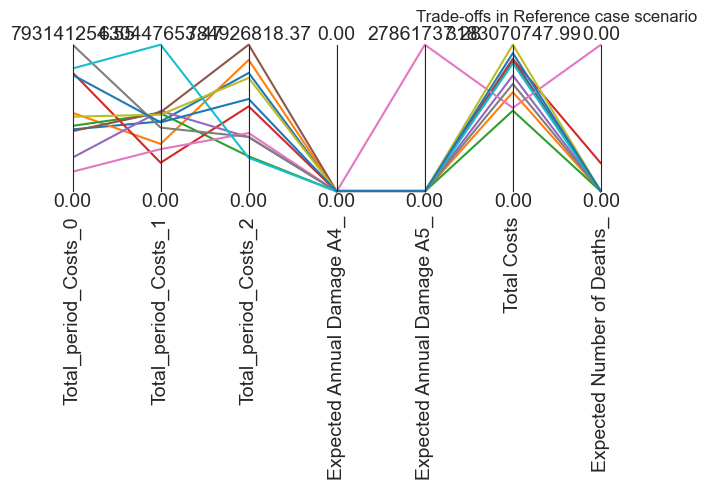

In [15]:
from ema_workbench.analysis import parcoords

df_outcomes = rf_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(df_outcomes)
ref_limits.loc[0, df_outcomes.columns] = 0

paraxes = parcoords.ParallelAxes(ref_limits)
paraxes.plot(df_outcomes)
plt.title('Trade-offs in Reference case scenario')
# 
# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()


In [16]:
list(df_outcomes.columns)

['Total_period_Costs_0',
 'Total_period_Costs_1',
 'Total_period_Costs_2',
 'Expected Annual Damage A4_',
 'Expected Annual Damage A5_',
 'Total Costs',
 'Expected Number of Deaths_']

In [17]:
print("Model Outcomes:", [o.name for o in model.outcomes])
print("DataFrame Columns:", rf_policy_set.columns)


Model Outcomes: ['Total_period_Costs_0', 'Total_period_Costs_1', 'Total_period_Costs_2', 'Expected Annual Damage A4_', 'Expected Annual Damage A5_', 'Total Costs', 'Expected Number of Deaths_']
DataFrame Columns: Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '0_RfR 3', '0_RfR 4', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '1_RfR 3', '1_RfR 4', '2_RfR 0', '2_RfR 1',
       '2_RfR 2', '2_RfR 3', '2_RfR 4', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '3_RfR 3', '3_RfR 4', '4_RfR 0', '4_RfR 1', '4_RfR 2', '4_RfR 3',
       '4_RfR 4', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0',
       'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.1_DikeIncrease 3',
       'A.1_DikeIncrease 4', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.2_DikeIncrease 3', 'A.2_DikeIncrease 4',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.3_DikeIncrease 3', 'A.3_DikeIncrease 4', 'A.4_DikeIncrease 0',
       'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.4_DikeIncrease 3

In [18]:
rf_policy_set

,0_RfR 0,0_RfR 1,0_RfR 2,0_RfR 3,0_RfR 4,1_RfR 0,1_RfR 1,1_RfR 2,1_RfR 3,1_RfR 4,...,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4,Total_period_Costs_0,Total_period_Costs_1,Total_period_Costs_2,Expected Annual Damage A4_,Expected Annual Damage A5_,Total Costs,Expected Number of Deaths_
0,1,1,1,0,1,0,0,1,0,1,...,5,7,7,3.352497e+08,3.007242e+08,6.337760e+08,0.0,0.000000e+00,2.875432e+09,0.000000
1,1,0,1,1,0,0,0,0,0,0,...,3,1,8,4.250251e+08,2.041795e+08,7.034126e+08,0.0,0.000000e+00,2.152653e+09,0.000000
2,0,0,1,0,0,1,0,0,0,1,...,3,3,7,3.546900e+08,3.355710e+08,1.878120e+08,0.0,0.000000e+00,1.753206e+09,0.000000
3,1,1,1,1,0,1,0,0,1,0,...,4,7,3,6.428243e+08,1.233321e+08,4.549186e+08,0.0,0.000000e+00,2.866503e+09,0.000885
4,0,0,0,1,1,0,0,0,1,1,...,6,9,0,1.830842e+08,3.459992e+08,2.900585e+08,0.0,0.000000e+00,2.515476e+09,0.000000
5,0,0,1,0,1,0,0,0,0,0,...,7,7,8,3.260330e+08,3.403345e+08,7.849268e+08,0.0,0.000000e+00,2.819309e+09,0.000000
6,0,0,1,0,0,0,0,0,0,1,...,2,1,8,1.068451e+08,1.818616e+08,3.122996e+08,0.0,2.786174e+07,1.811954e+09,0.004622
7,1,0,0,0,1,1,0,0,1,0,...,1,5,2,7.931413e+08,2.740267e+08,2.919054e+08,0.0,0.000000e+00,2.331829e+09,0.000000
8,0,0,0,0,0,1,0,0,1,1,...,2,2,8,4.041724e+08,3.299696e+08,6.068891e+08,0.0,0.000000e+00,3.183071e+09,0.000000
9,1,0,0,0,1,1,1,0,1,0,...,0,4,0,6.645763e+08,6.304477e+08,1.797372e+08,0.0,0.000000e+00,2.776629e+09,0.000000


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

<Figure size 1200x1200 with 0 Axes>

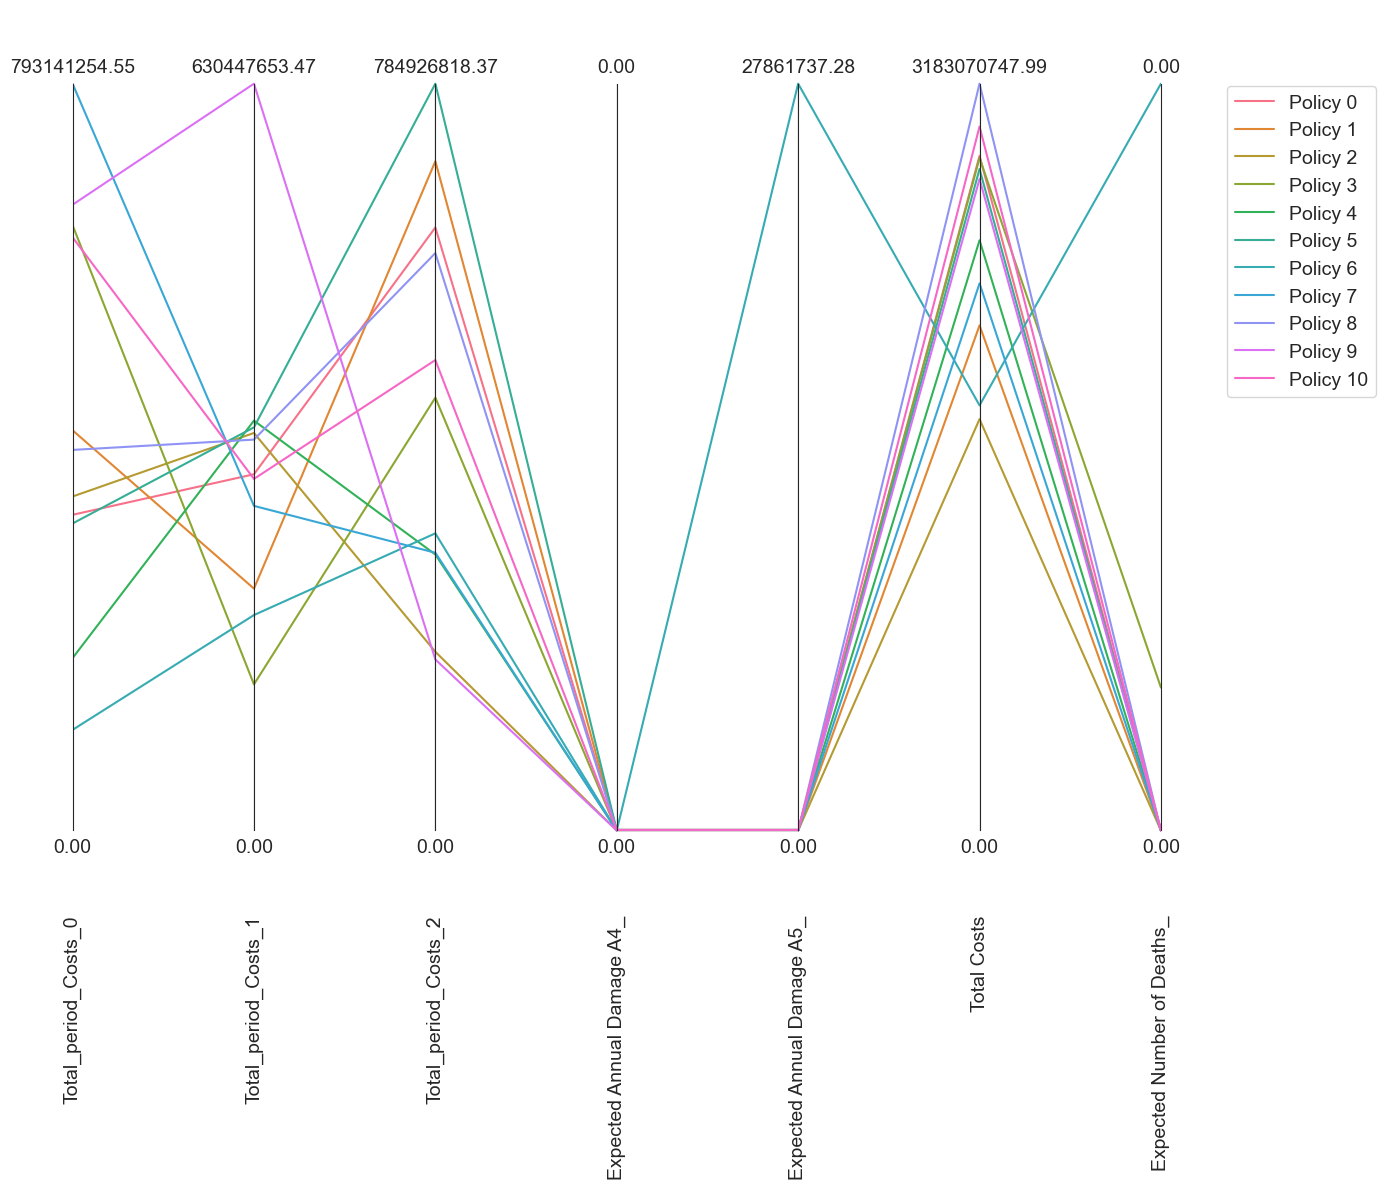

<Figure size 1200x1200 with 0 Axes>

In [19]:

# Assuming WC_policy_set and model are already defined
df_outcomes = rf_policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(df_outcomes)
ref_limits.loc[0,df_outcomes.columns] = 0

# Create a ParallelAxes object
paraxes = parcoords.ParallelAxes(ref_limits)
# 
# Generate a color palette
colors = sns.color_palette('husl', len(rf_policy_set))

#Plot each policy individually with a corresponding color and label
for i, (index, row) in enumerate(rf_policy_set.iterrows()):

        outcomes = row.loc[['Total_period_Costs_0','Total_period_Costs_1','Total_period_Costs_2','Expected Annual Damage A4_',
                            'Expected Annual Damage A5_', 'Total Costs','Expected Number of Deaths_']]
        
        paraxes.plot(outcomes.to_frame().T, color=colors[i], label=f'Policy {index}')

# Add a legend to the plot
paraxes.legend()

# Set the figure size
plt.figure(figsize=(12, 12))



### (2) NFE Check

In [20]:
convergencee = pd.read_csv('Week24_MORDM_epsilon_overijssel_PD7_.csv')

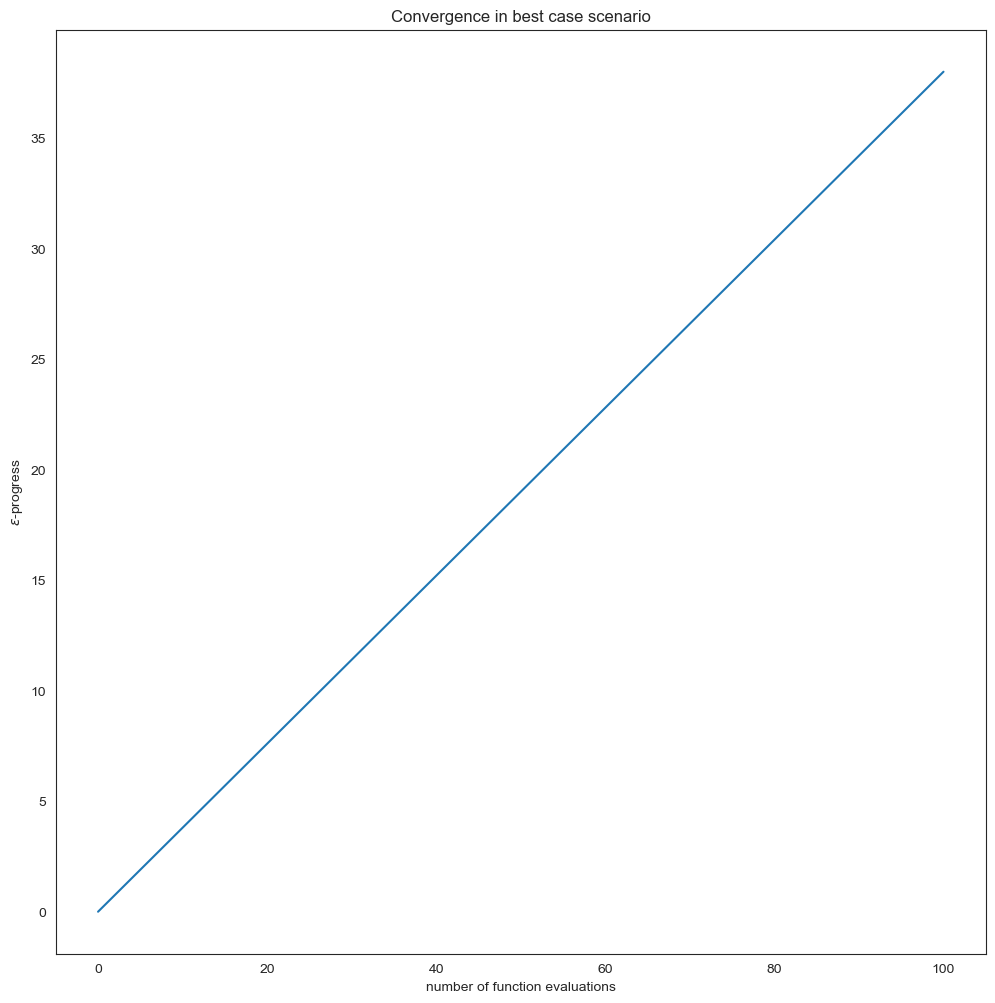

In [21]:
import matplotlib.pyplot as plt
plt.plot(convergencee.nfe,convergencee.epsilon_progress)

### Seed toepassen 

plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence in best case scenario')
plt.show()

### Open Exploration analysis 

#### - (1) 


In [22]:
experiments_pol_set.iloc[:,:71]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.4_DikeIncrease 3,A.4_DikeIncrease 4,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,A.5_DikeIncrease 4
0,65,226.071172,1.0,0.768509,128.154315,1.0,0.752448,250.583103,10.0,0.281058,...,7,8,2,4,2,3,4,4,9,2
1,38,180.454728,10.0,0.521985,188.049927,10.0,0.537400,313.335273,10.0,0.105592,...,7,8,2,4,2,3,4,4,9,2
2,115,116.262154,1.0,0.554640,195.513995,10.0,0.631468,70.408268,1.5,0.664489,...,7,8,2,4,2,3,4,4,9,2
3,72,43.597023,1.0,0.121351,234.241788,1.5,0.918725,115.943143,10.0,0.432601,...,7,8,2,4,2,3,4,4,9,2
4,43,127.948986,10.0,0.139792,118.277711,1.5,0.953242,307.864200,10.0,0.736896,...,7,8,2,4,2,3,4,4,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62,122.706744,1.0,0.888093,217.695591,10.0,0.391010,296.955174,1.0,0.609759,...,5,2,3,9,4,1,3,9,0,3
996,71,322.711836,10.0,0.663336,119.809763,1.0,0.367821,150.015608,1.5,0.652341,...,5,2,3,9,4,1,3,9,0,3
997,17,339.859165,10.0,0.496682,211.901571,1.0,0.817830,197.057941,1.0,0.118192,...,5,2,3,9,4,1,3,9,0,3
998,67,64.438379,1.0,0.455935,266.029249,10.0,0.086689,90.147757,1.0,0.757412,...,5,2,3,9,4,1,3,9,0,3


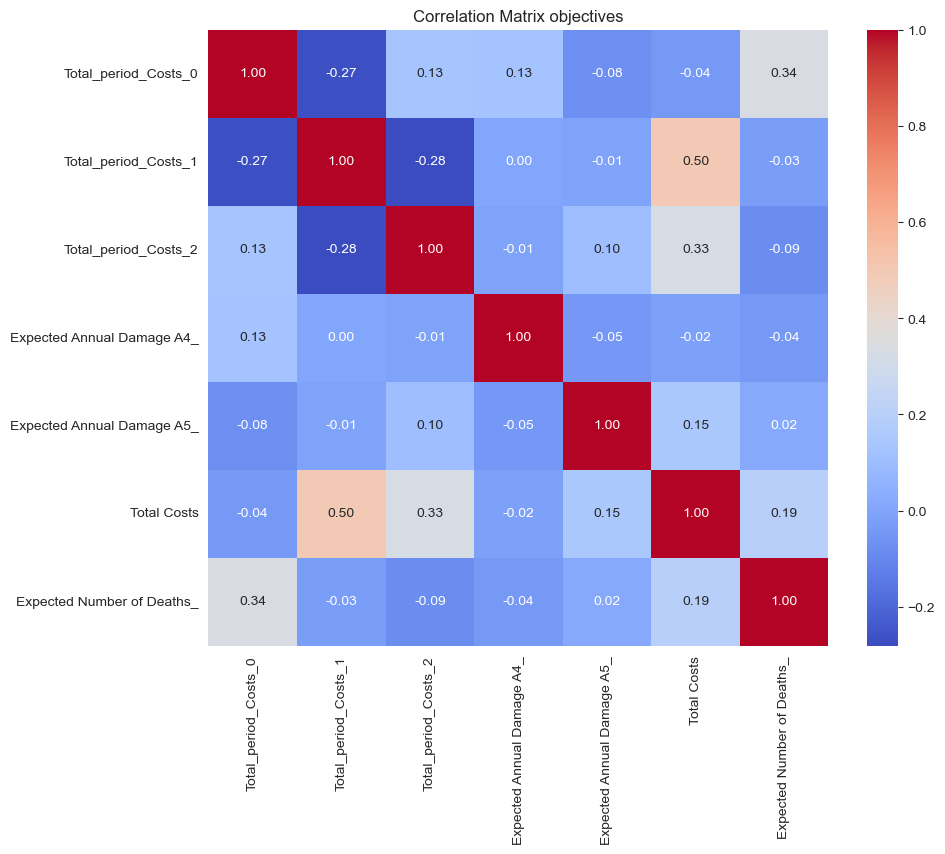

In [23]:
data = {}
for k,v in outcomes_pol_set.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix objectives')
plt.show()

In [24]:
outcomes_pol_set

{'Total_period_Costs_0': array([1.71419659e+08, 1.58537679e+08, 1.59349925e+08, 1.89564891e+08,
        1.61028473e+08, 1.58537679e+08, 1.59480487e+08, 6.96770702e+08,
        1.67532339e+08, 1.61988008e+08, 1.67474169e+08, 1.58537679e+08,
        1.58990789e+08, 1.58537679e+08, 1.58537679e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 1.58537679e+08, 1.58537679e+08,
        1.60124559e+08, 1.58537679e+08, 1.58537679e+08, 1.58646739e+08,
        1.58537679e+08, 1.58537679e+08, 1.58537679e+08, 1.60359461e+08,
        1.82290678e+08, 1.66347372e+08, 1.74165394e+08, 1.79723558e+08,
        1.59617176e+08, 1.58537679e+08, 1.58537679e+08, 4.86705962e+08,
        1.58537679e+08, 1.59707924e+08, 1.61300866e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 1.74301575e+08, 2.64601920e+08,
        1.58537679e+08, 1.59973476e+08, 1.66882445e+08, 2.06460983e+08,
        1.58537679e+08, 1.58537679e+08, 1.72401846e+08, 1.58537679e+08,
        1.58537679e+08, 1.58537679e+08, 

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


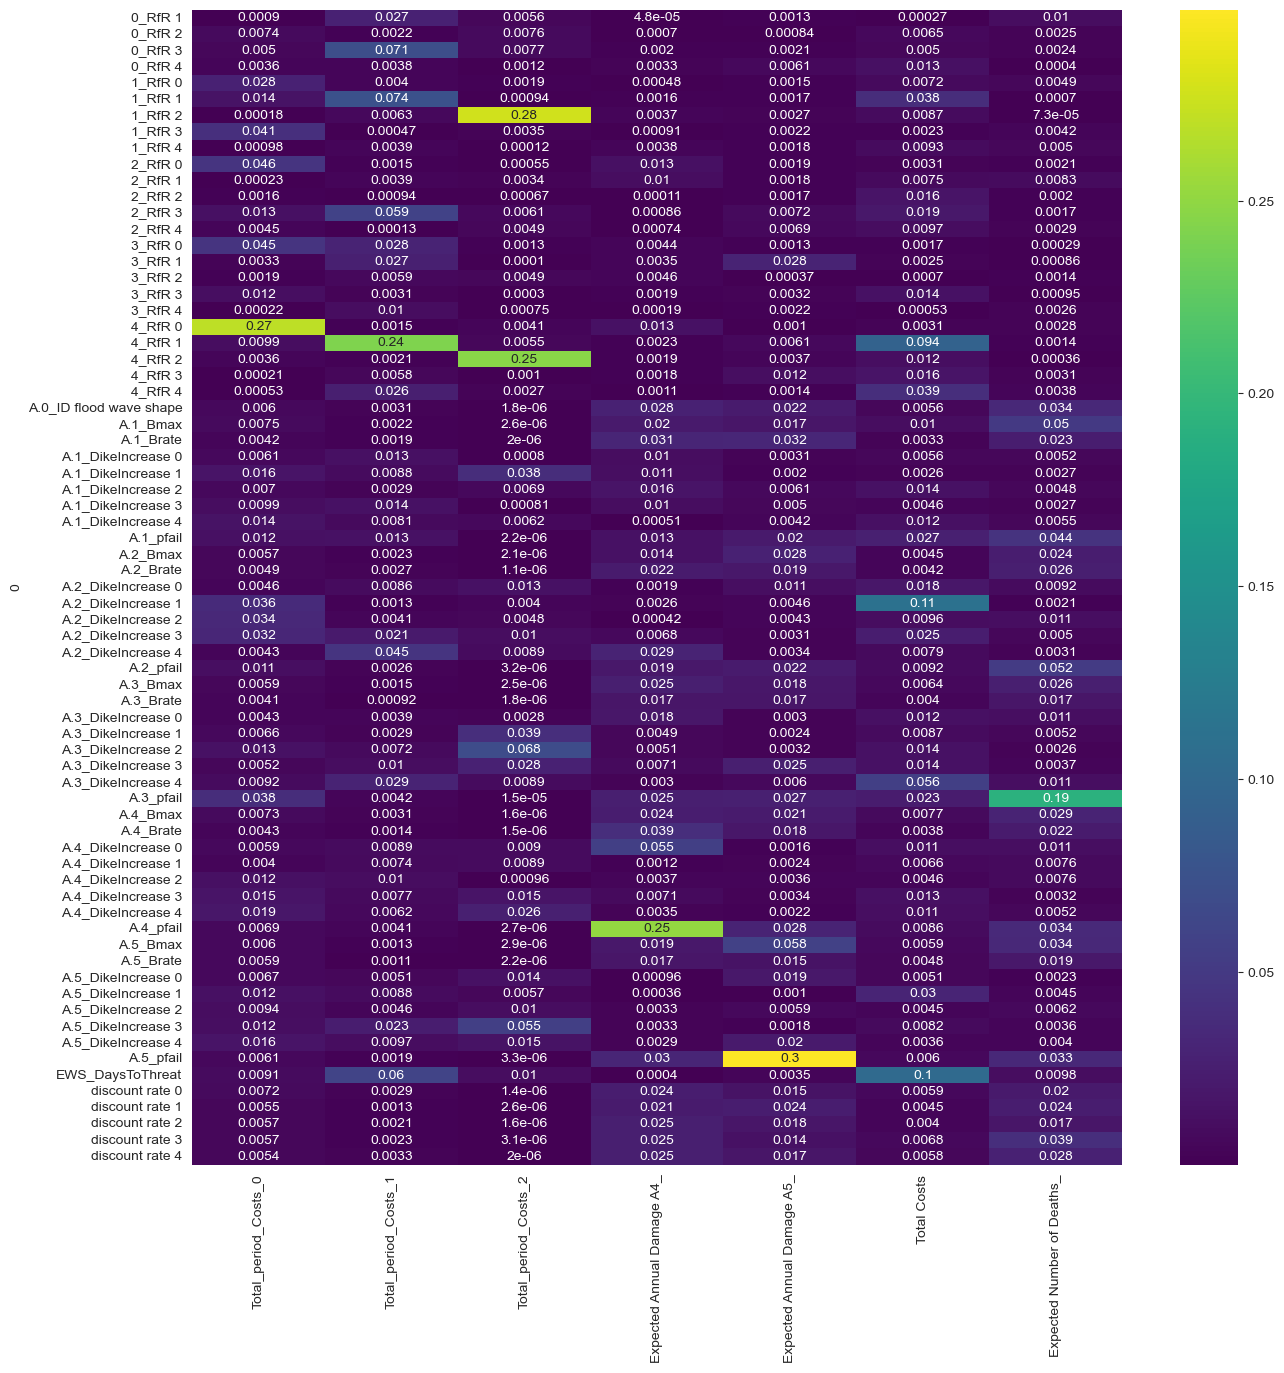

In [25]:
from ema_workbench.analysis import feature_scoring
 
x = experiments_pol_set.iloc[:,:71]
y = outcomes_pol_set

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

### Sobol

In [26]:
from SALib.analyze import sobol

In [27]:
for outcome in outcomes_pol_set:
    print(outcome)

Total_period_Costs_0
Total_period_Costs_1
Total_period_Costs_2
Expected Annual Damage A4_
Expected Annual Damage A5_
Total Costs
Expected Number of Deaths_


In [43]:
xx = x.iloc[:,[1]]
xx

,A.1_Bmax
0,226.071172
1,180.454728
2,116.262154
3,43.597023
4,127.948986
...,...
995,122.706744
996,322.711836
997,339.859165
998,64.438379


In [29]:
yy = pd.DataFrame(y)

In [30]:
yy.size

7000

In [31]:
from SALib.sample import saltelli
problem = {
    'num_vars': len(x.columns),
    'names': list(x.columns),
    'bounds': [(min(x[col]), max(x[col])) for col in x],
    'dists': ['unif'] * len(x.columns)
}

param_values = saltelli.sample(problem, 2000, calc_second_order=True)

for _ in range(len(yy.columns)):
    print(yy.iloc[:,_])
    Si = sobol.analyze(problem, yy.iloc[:,_], print_to_console=True)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_22324\593760227.py:9: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2000, calc_second_order=True)
C:\Users\Gebruiker\anaconda3\Lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (2000) is equal to `2^n`.
        
  warnings.warn(msg)


0      1.714197e+08
1      1.585377e+08
2      1.593499e+08
3      1.895649e+08
4      1.610285e+08
           ...     
995    7.479595e+08
996    7.500269e+08
997    7.508309e+08
998    7.553475e+08
999    7.665894e+08
Name: Total_period_Costs_0, Length: 1000, dtype: float64


RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [44]:
import pandas as pd
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol

# Assuming 'x' is your DataFrame with 1000 samples for 71 input variables
# And 'yy' is your DataFrame with 1000 samples for 10 outcomes

# Step 1: Define the problem dictionary
problem = {
    'num_vars': len(xx.columns),  # Number of input variables
    'names': list(xx.columns),  # Names of the input variables
    'bounds': [(min(xx[col]), max(xx[col])) for col in xx],  # Bounds for each input variable
    'dists': ['unif'] * len(xx.columns)  # Assuming uniform distribution for each variable
}

param_values = saltelli.sample(problem, 2000, calc_second_order=True)
# Step 3: Run Sobol analysis for each outcome
results = {}
for outcome in yy.columns:
    # Assuming the order of rows in `yy` corresponds to the order of rows in `x`
    Y = yy[outcome].values  # Extract outcome values as array
    
    # Check the sample size consistency
    if len(Y) != param_values.shape[0] // (len(problem['names']) + 2):
        raise ValueError("Number of samples in outcomes does not match the required number of samples for Sobol analysis")

    else: # Perform Sobol sensitivity analysis
        Si = sobol.analyze(problem, Y, print_to_console=True)
        
        results[outcome] = Si

sobol_indices = {}
for outcome, Si in results.items():
    sobol_indices[outcome] = {
        'S1': Si['S1'],
        'ST': Si['ST'],
        'S2': Si['S2']
    }

sobol_df = pd.DataFrame(sobol_indices)
print(sobol_df)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_22324\1582113322.py:19: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2000, calc_second_order=True)
C:\Users\Gebruiker\anaconda3\Lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (2000) is equal to `2^n`.
        
  warnings.warn(msg)


ValueError: Number of samples in outcomes does not match the required number of samples for Sobol analysis